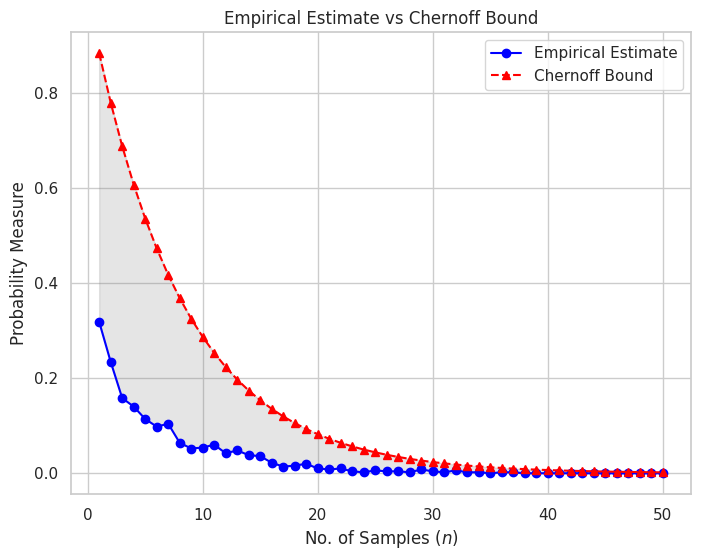

In [58]:
import numpy as np
import matplotlib.pyplot as plt



def generate_samples(n, sigma):
    """
    Generates n samples from a zero mean Gaussian distribution with standard deviation sigma.

    Parameters:
    - n: Number of samples to generate.
    - sigma: Standard deviation of the Gaussian distribution.

    Returns:
    - samples: An array containing n samples drawn from the Gaussian distribution.
    """
    # Use NumPy's random.normal function to generate n samples from a Gaussian distribution
    # with mean 0 and standard deviation sigma.
    sample = np.random.normal(0, sigma, n)


    return sample


def monte_carlo_simulation(n, epsilon, sigma, iterations):
    # Initialize a counter for the number of experiments where sample average exceeds epsilon
    count = 0

    # Perform the Monte Carlo simulation for the specified number of experiments
    for _ in range(iterations):
        # Generate n samples from a zero mean Gaussian distribution with standard deviation sigma
        sample = generate_samples(n, sigma)

        # Calculate the sample average
        sample_avg = np.mean(sample)

        # Check if the sample average is greater than epsilon
        if sample_avg > epsilon:
            count += 1

    # Calculate the empirical probability of the sample average exceeding epsilon
    empirical_probability = count / iterations


    return empirical_probability



def chernoff_upper_bound(n, epsilon, sigma):
    """
    Calculates the upper bound using Chernoff inequality for the probability of the sample average
    exceeding a given threshold epsilon in a sum of n independent, zero mean Gaussian random variables.

    Parameters:
    - n: Number of random variables in the sum.
    - epsilon: Threshold for the sample average.
    - sigma: Standard deviation of the Gaussian random variables.

    Returns:
    - bound: The Chernoff upper bound for the probability.
    """
    # Chernoff bound formula for the probability P[X >= epsilon] in a sum of n Gaussian random variables
    # with zero mean and standard deviation sigma.
    bound = np.exp(-n * epsilon**2 / (2 * sigma**2))

    # Return the calculated Chernoff upper bound.
    return bound


def solver(epsilon, sigma, iterations=500):
    values = np.arange(1, 51)
    estimates = []
    chernoff_bounds = []

    for n in values:

    # Calculate both empirical probability and Chernoff upper bound using functions defined above
        empirical_prob = monte_carlo_simulation(n, epsilon, sigma, iterations)
        chernoff_bound = chernoff_upper_bound(n, epsilon, sigma)

    # Append both values to their respective lists
        estimates.append(empirical_prob)
        chernoff_bounds.append(chernoff_bound)


    plt.figure(figsize=(8, 6))

    # Plot empirical estimate from Monte Carlo  Estimation
    plt.plot(values, estimates, label='Empirical Estimate', marker='o', linestyle='-', color='blue')

    # Plot Chernoff upper bound
    plt.plot(values, chernoff_bounds, label='Chernoff Bound', marker='^', linestyle='--', color='red')

    plt.fill_between(values, estimates, chernoff_bounds, color='grey', alpha=0.2)
    plt.xlabel('No. of Samples ($n$)')
    plt.ylabel('Probability Measure')
    plt.title(f'Empirical Estimate vs Chernoff Bound')
    plt.legend(loc='upper right')

    plt.show()

# Given Parameters
epsilon = 0.05
sigma = 0.1

# Execution
solver(epsilon, sigma)
